In [1]:
import os
import torch
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
from tnia.plotting.plt_helper import random_label_cmap, imshow_multi2d

import micro_sam

print(f"Using micro_sam version: {micro_sam.__version__}")

c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using micro_sam version: 1.5.0


In [7]:
tile_shape = None #(384, 384)
halo = (64, 64)
model_type = "vit_b_lm"

device = "cuda" if torch.cuda.is_available() else "cpu" # the device/GPU used for training
# Step 1: Get the 'predictor' and 'segmenter' to perform automatic instance segmentation.
predictor, segmenter = get_predictor_and_segmenter(
    model_type=model_type, # choice of the Segment Anything model
    device=device,  # the device to run the model inference.
    is_tiled = (tile_shape is not None),  # whether the model is tiled or not.
)

In [8]:
from skimage.io import imread
import numpy as np

from tnia.gui.widgets import image_batch_base_op

image = imread(r"D:\images\tnia-python-images\imagesc\2024_10_11_tough_cellpose_2\img52.tif")
print(image.shape)

image_ = np.transpose(image, (2, 0, 1))  # transpose to (C, H, W) format
print(image_.shape)

(748, 757, 3)
(3, 748, 757)


In [9]:

# Step 2: Get the instance segmentation for the given image.
prediction = automatic_instance_segmentation(
    predictor=predictor,  # the predictor for the Segment Anything model.
    segmenter=segmenter,  # the segmenter class responsible for generating predictions.
    input_path=image_,
    ndim=3,
    tile_shape=tile_shape,
    halo=halo,
)



Merge segmentation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


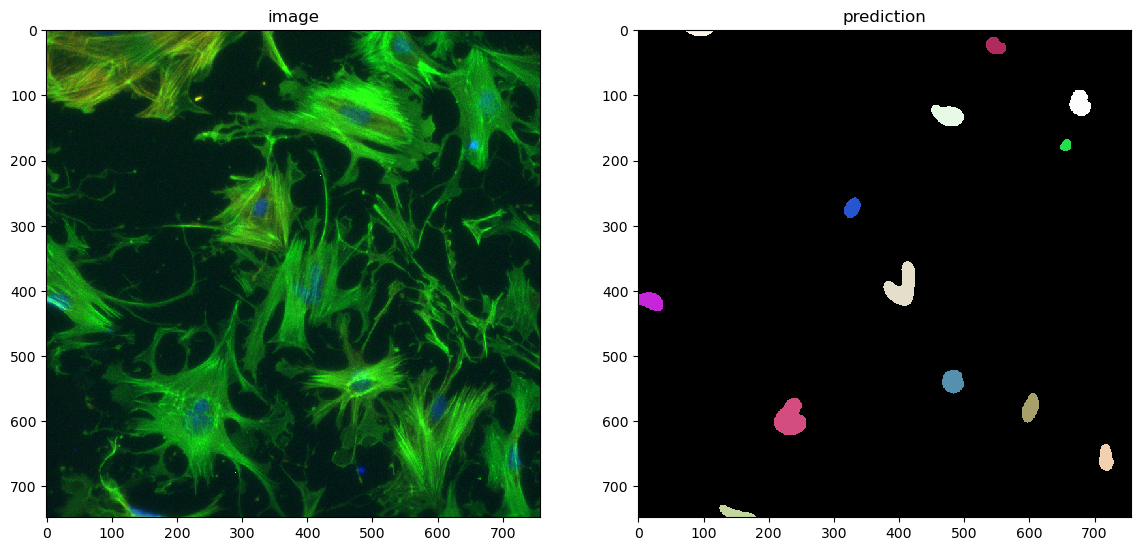

In [11]:
fig = imshow_multi2d([image//255, prediction[2]], ['image', 'prediction'], 1, 2, 14, 7, colormaps=['gray', random_label_cmap()])